Zaur Gouliev 18718545
Sean Moiselle 17461824

# Shortest Path & Graphs

*accompanying file Task2_Explination.pdf*

### This is simply a dictionary to store the all of the values of the graph

In [1]:
mapp = {
    'A': {'B': 5, 'E': 9, 'H': 8},
    'B': {'C': 12, 'D': 15, 'H': 4},
    'C': {'D': 3, 'F': 1, 'G': 11, 'H': 7},
    'D': {'G': 9},
    'E': {'F': 4, 'G': 20, 'H': 5},
    'F': {'G': 13, 'H': 6},
    'G': {},
    'H': {}
}

## networkx graph

The graph is constructed using networkx libraries and the data above

In [2]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import sys
G = nx.Graph()

for key in mapp.keys():
    G.add_node(key)
    
to_add = []
for key, val in mapp.items():
    for in_key, in_val in val.items():
        to_add.append((key, in_key, in_val))

        
G.add_weighted_edges_from(to_add)

nx.info(G)

C:\Users\Zaurg\AppData\Local\Temp/ipykernel_11380/1694382460.py:18: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 8 nodes and 16 edges'

# Graphing the network

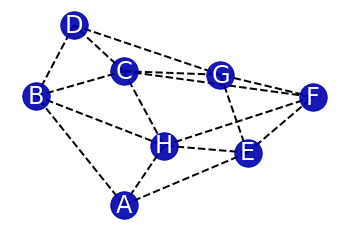

In [3]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 750, alpha = 0.9, node_color = '#0000ac')
nx.draw_networkx_edges(G, pos, 
                       width = 2, alpha = 1, edge_color = 'k', style = 'dashed')
nx.draw_networkx_labels(G, pos, font_size = 24, font_color = 'white')
limits = plt.axis('off')

## Djikstra
This uses the djikstra algorithm of the networkx library to find the shortest paths to each node from A

In [4]:
def get_cost(path):
    
    curr_node = path[0]
    curr_cost = 0
    for node in path[1:]:
        curr_cost += G[curr_node][node]["weight"]
        curr_node = node
    
    return curr_cost

to_not_rem = set()
for key in mapp.keys():
    path = nx.dijkstra_path(G, 'A', key)
    print("Path: " + str(path))
    print("Cost: " + str(get_cost(path)) + "\n")
    
    for i in range (1,len(path)):
        to_not_rem.add((path[i-1], path[i]))
    

Path: ['A']
Cost: 0

Path: ['A', 'B']
Cost: 5

Path: ['A', 'E', 'F', 'C']
Cost: 14

Path: ['A', 'E', 'F', 'C', 'D']
Cost: 17

Path: ['A', 'E']
Cost: 9

Path: ['A', 'E', 'F']
Cost: 13

Path: ['A', 'E', 'F', 'C', 'G']
Cost: 25

Path: ['A', 'H']
Cost: 8



## Remove edges that aren't being used

In [5]:
for start_node, end_node in list(G.edges()):
       if (start_node, end_node) not in to_not_rem and (end_node, start_node) not in to_not_rem:
            G.remove_edge(start_node, end_node)
            
nx.info(G)

C:\Users\Zaurg\AppData\Local\Temp/ipykernel_11380/2619865847.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 8 nodes and 7 edges'

## Graphing the updated Graph

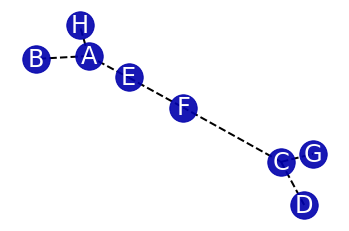

In [6]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 750, alpha = 0.9, node_color = '#0000ac')
nx.draw_networkx_edges(G, pos, 
                       width = 2, alpha = 1, edge_color = 'k', style = 'dashed')
nx.draw_networkx_labels(G, pos, font_size = 24, font_color = 'white')
limits = plt.axis('off')

# Analysis of Shortest Paths and Graphs

The path search problem is the concept of finding the optimum path between the present location and the destination, given a set of conditions (Noto & Sato, 2000). Dijkstra's algorithm is one such process to finding the shortest, or more specifically the 'optimum' path. This algorithm searches for the 'minimum-cost' route of all paths in order, from the beginning the algorithm then expands concentrically (Noto & Sato, 2000). 

The general concept of dijkstras is that it proceeds using a 'two step' approach. Wherein it investigates the cost of reaching all available nodes, if they have not been visited prior and then choose the node which holds the lowest cost. As a result of being able to obtain information pertaining to the shortest path, Dijkstras algorithm has been implemented in robot path-planning in academic environments (Wang, Yu & Yuan, 2011).

Dijkstra's Algorithm itself has a time complexity of O(V^2), hopwever with the implementation of a min-priority queue it can achieve a time complexity of O(V + E log V) ("Shortest Path Algorithms Tutorials & Notes | Algorithms | HackerEarth", ND)

As a result of the structure or process which Dijkstras utilizes it does bare some disadvantages such as harboring a long search time given that the distance to the destination is quite excessive (Noto & Sato, 2000), this inefficiency can be displayed in our own graph by the visitation of D prior to visiting G..


# References

Noto, M., & Sato, H. (2000). A Method for the Shortest Path Search by Extended Dijkstra Algorithm. IEEE.

Wang, H., Yu, Y., & Yuan, Q. (2011). Application of Dijkstra algorithm in robot path-planning. IEEE.

Shortest Path Algorithms Tutorials & Notes | Algorithms | HackerEarth. (ND). Retrieved 25 April 2022, from https://www.hackerearth.com/practice/algorithms/graphs/shortest-path-algorithms/tutorial/#:~:text=Time%20Complexity%20of%20Dijkstra's%20Algorithm,E%20l%20o%20g%20V%20)%20.